# __1. Análise Exploratória I: Zeros e Valores Missing__ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import autoimpute as imp

import sys
sys.path.insert(0, '../src')

In [3]:
from modulos.tools import subes

In [5]:
jps = subes('JPS')

In [7]:
jps.desc()

Nome: João Pessoa
Latitude: -7.129694000000001
Longitude: -34.86775


In [8]:
jps.df.head()

,data,JPS_TIPO_12B1_WATT,JPS_TIPO_12B2_WATT,JPS_TIPO_11B1_WATT,JPS_TIPO_11B2_WATT,JPS_TIPO_21L1_WATT,JPS_TIPO_21L2_WATT,JPS_TIPO_21L3_WATT,JPS_TIPO_21L4_WATT,JPS_TIPO_21L5_WATT,JPS_TIPO_21L6_WATT,JPS_TIPO_21L7_WATT,JPS_TIPO_21L8_WATT,JPS_TIPO_21L9_WATT
0,2008-01-01 00:00:00,7.9,10.2,7.8,10.2,1.961,0.561,0.988,1.220,0.877,3.361,2.294,1.737,3.618
1,2008-01-01 00:15:00,7.7,10.1,7.7,10.0,1.938,0.556,0.968,1.167,0.840,3.339,2.227,1.798,3.469
2,2008-01-01 00:30:00,7.7,9.8,7.7,10.0,1.933,0.567,0.894,1.174,0.843,3.291,2.115,1.653,3.546
3,2008-01-01 00:45:00,7.4,9.8,7.4,10.0,1.892,0.567,0.894,1.176,0.815,3.211,2.066,1.630,3.376
4,2008-01-01 01:00:00,0.0,0.0,0.0,0.0,1.860,0.000,0.864,1.146,0.812,3.268,2.027,1.667,3.483


#### __Trocando os zeros por NaN__

In [9]:
jps.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210432 entries, 0 to 210431
Data columns (total 14 columns):
data                  210432 non-null datetime64[ns]
JPS_TIPO_12B1_WATT    210432 non-null float64
JPS_TIPO_12B2_WATT    210432 non-null float64
JPS_TIPO_11B1_WATT    210432 non-null float64
JPS_TIPO_11B2_WATT    210432 non-null float64
JPS_TIPO_21L1_WATT    210432 non-null float64
JPS_TIPO_21L2_WATT    210432 non-null float64
JPS_TIPO_21L3_WATT    210432 non-null float64
JPS_TIPO_21L4_WATT    210432 non-null float64
JPS_TIPO_21L5_WATT    210432 non-null float64
JPS_TIPO_21L6_WATT    210432 non-null float64
JPS_TIPO_21L7_WATT    210432 non-null float64
JPS_TIPO_21L8_WATT    210432 non-null float64
JPS_TIPO_21L9_WATT    210432 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 22.5 MB


In [10]:
df1 = jps.df.replace(0, np.nan)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210432 entries, 0 to 210431
Data columns (total 14 columns):
data                  210432 non-null datetime64[ns]
JPS_TIPO_12B1_WATT    204713 non-null float64
JPS_TIPO_12B2_WATT    205259 non-null float64
JPS_TIPO_11B1_WATT    205291 non-null float64
JPS_TIPO_11B2_WATT    204841 non-null float64
JPS_TIPO_21L1_WATT    205828 non-null float64
JPS_TIPO_21L2_WATT    204604 non-null float64
JPS_TIPO_21L3_WATT    205766 non-null float64
JPS_TIPO_21L4_WATT    205783 non-null float64
JPS_TIPO_21L5_WATT    205765 non-null float64
JPS_TIPO_21L6_WATT    205749 non-null float64
JPS_TIPO_21L7_WATT    205585 non-null float64
JPS_TIPO_21L8_WATT    205769 non-null float64
JPS_TIPO_21L9_WATT    205554 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 22.5 MB


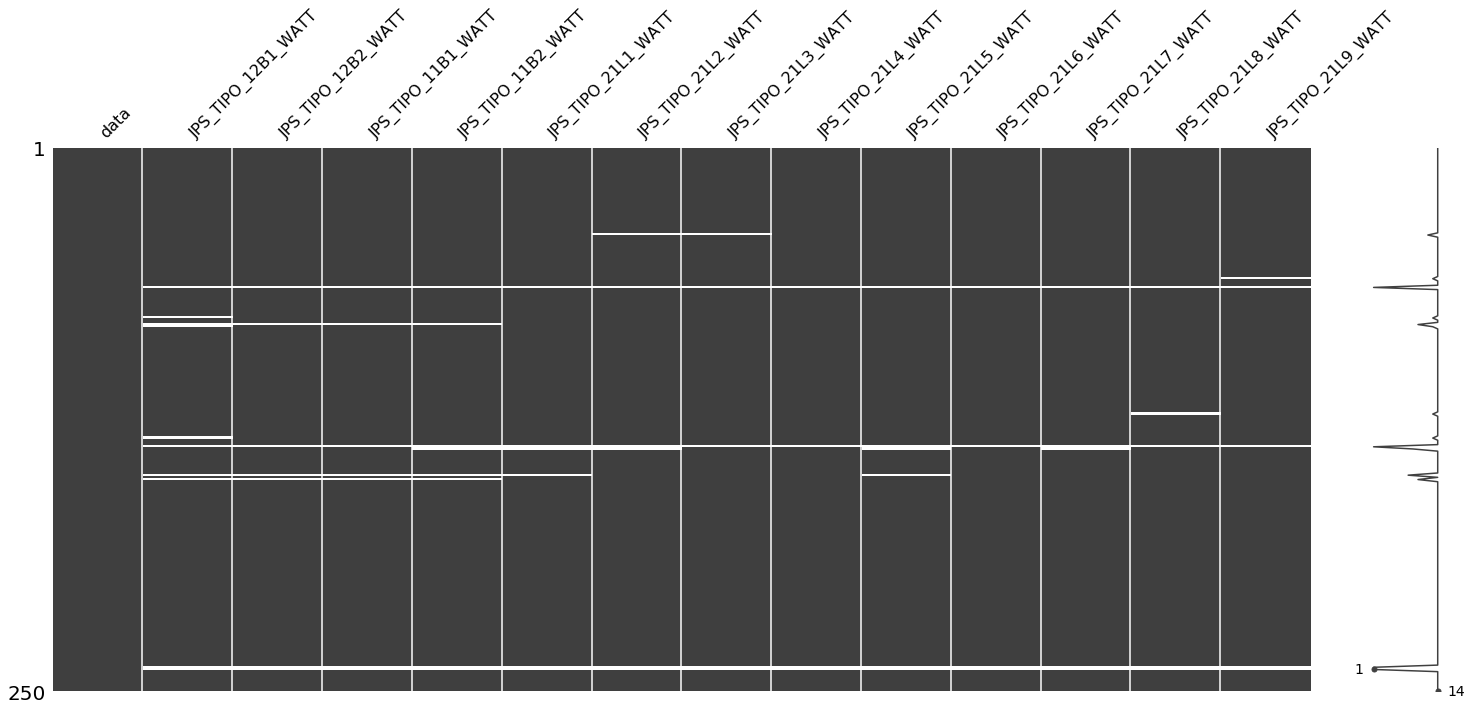

In [12]:
msno.matrix(df1.sample(250))

In [14]:
df1['data'] = pd.DatetimeIndex(df1['data'])
df1.set_index('data', inplace= True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210432 entries, 2008-01-01 00:00:00 to 2013-12-31 23:45:00
Data columns (total 13 columns):
JPS_TIPO_12B1_WATT    204713 non-null float64
JPS_TIPO_12B2_WATT    205259 non-null float64
JPS_TIPO_11B1_WATT    205291 non-null float64
JPS_TIPO_11B2_WATT    204841 non-null float64
JPS_TIPO_21L1_WATT    205828 non-null float64
JPS_TIPO_21L2_WATT    204604 non-null float64
JPS_TIPO_21L3_WATT    205766 non-null float64
JPS_TIPO_21L4_WATT    205783 non-null float64
JPS_TIPO_21L5_WATT    205765 non-null float64
JPS_TIPO_21L6_WATT    205749 non-null float64
JPS_TIPO_21L7_WATT    205585 non-null float64
JPS_TIPO_21L8_WATT    205769 non-null float64
JPS_TIPO_21L9_WATT    205554 non-null float64
dtypes: float64(13)
memory usage: 22.5 MB


In [16]:
df1.loc['2010']

,JPS_TIPO_12B1_WATT,JPS_TIPO_12B2_WATT,JPS_TIPO_11B1_WATT,JPS_TIPO_11B2_WATT,JPS_TIPO_21L1_WATT,JPS_TIPO_21L2_WATT,JPS_TIPO_21L3_WATT,JPS_TIPO_21L4_WATT,JPS_TIPO_21L5_WATT,JPS_TIPO_21L6_WATT,JPS_TIPO_21L7_WATT,JPS_TIPO_21L8_WATT,JPS_TIPO_21L9_WATT
data,,,,,,,,,,,,,
2010-01-01 00:00:00,11.4,9.9,11.4,9.8,2.435,0.667,1.053,2.527,0.963,2.042,2.653,1.972,3.951
2010-01-01 00:15:00,11.0,9.6,11.1,9.8,2.368,0.656,1.027,2.321,0.870,1.991,2.541,1.872,3.674
2010-01-01 00:30:00,10.7,9.5,10.6,9.4,2.297,0.640,1.015,2.255,0.897,1.981,2.428,1.901,3.638
2010-01-01 00:45:00,10.7,9.5,10.6,9.4,2.243,0.640,1.036,2.178,0.875,2.000,2.390,1.830,3.725
2010-01-01 01:00:00,10.7,9.3,10.6,9.3,2.193,0.630,1.025,2.130,0.875,1.999,2.393,1.843,3.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 22:45:00,12.4,11.2,12.0,11.4,2.733,0.694,1.296,3.118,1.077,2.238,2.671,2.054,4.259
2010-12-31 23:00:00,12.3,11.2,12.0,11.2,2.713,0.695,1.295,3.111,1.076,2.242,2.623,2.010,4.056
2010-12-31 23:15:00,12.0,10.9,11.7,11.2,2.615,0.677,1.269,3.017,1.079,2.185,2.572,1.977,3.988


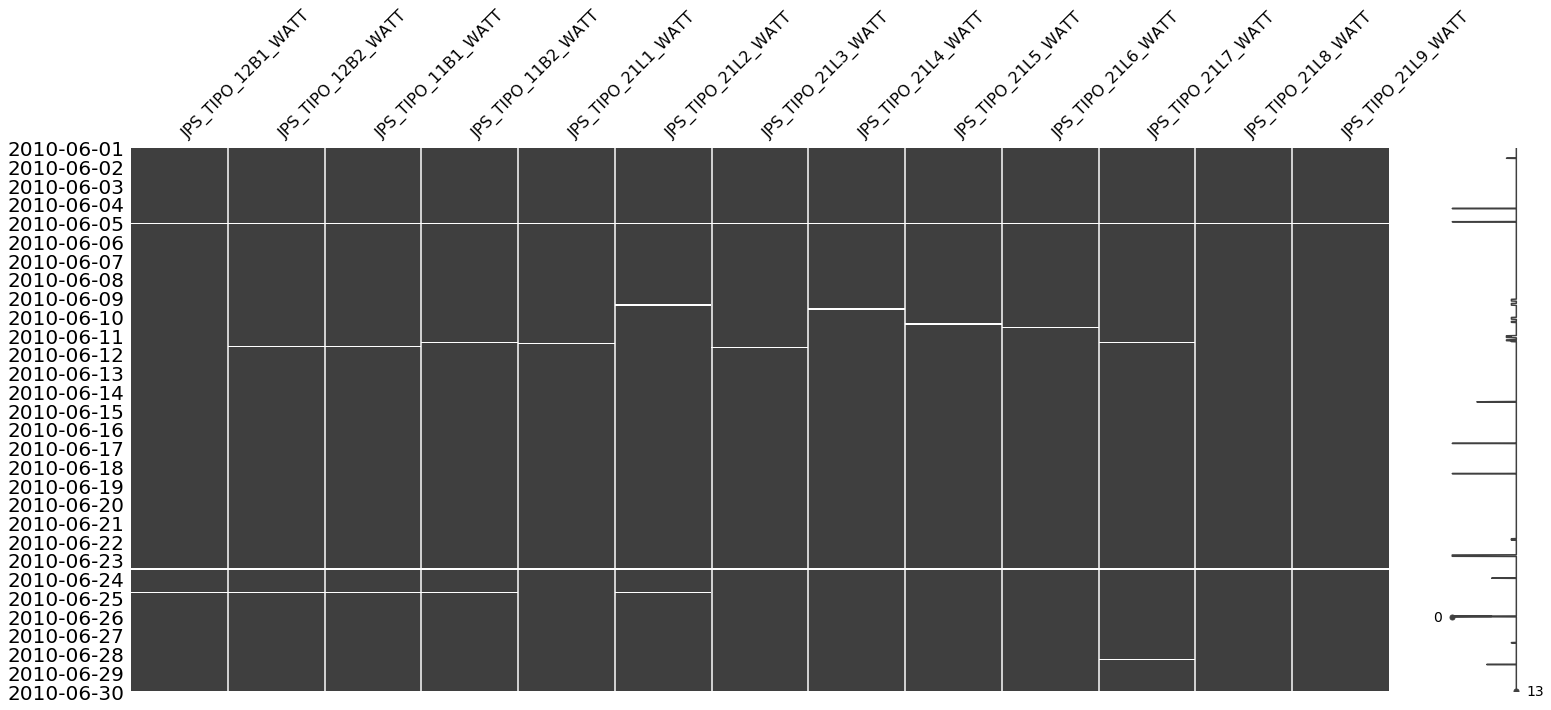

In [17]:
 msno.matrix(df1.loc['2010-06'] , freq='D')

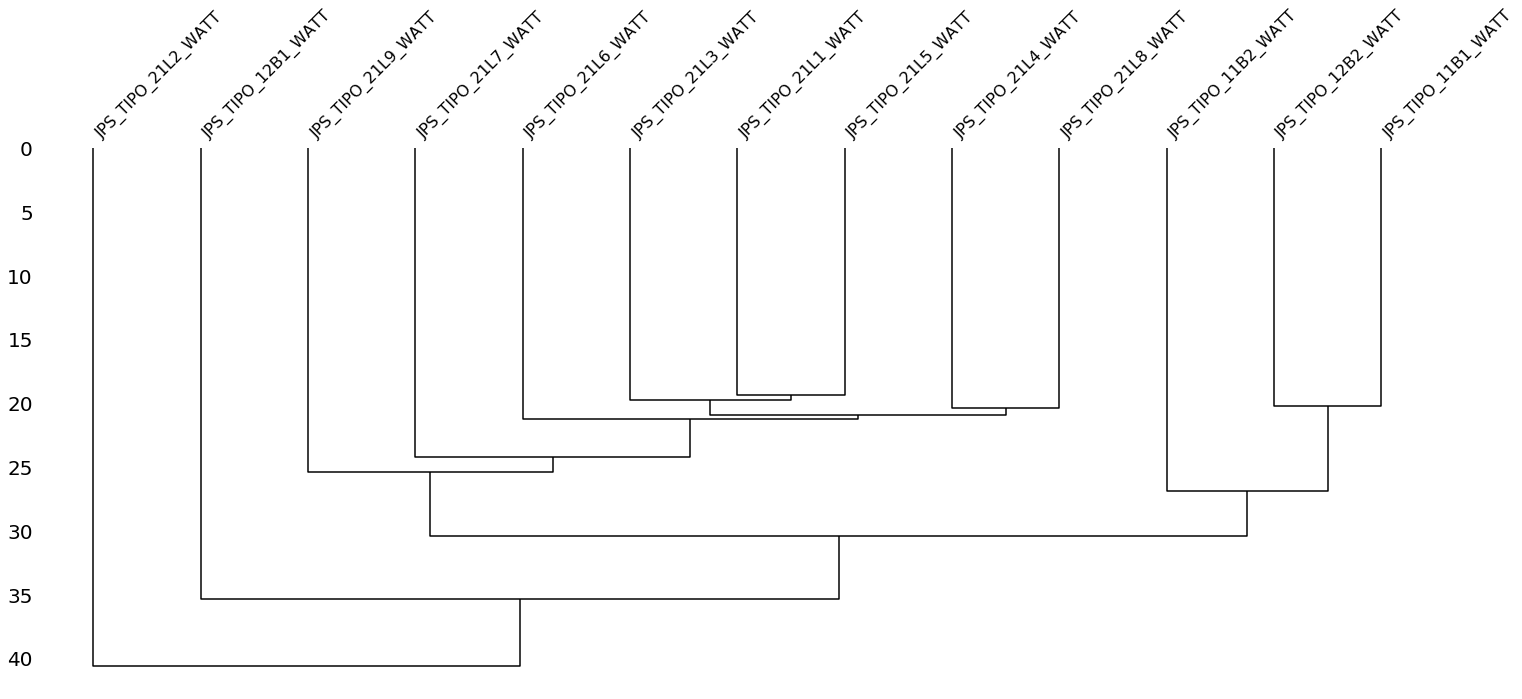

In [18]:
msno.dendrogram(df1)

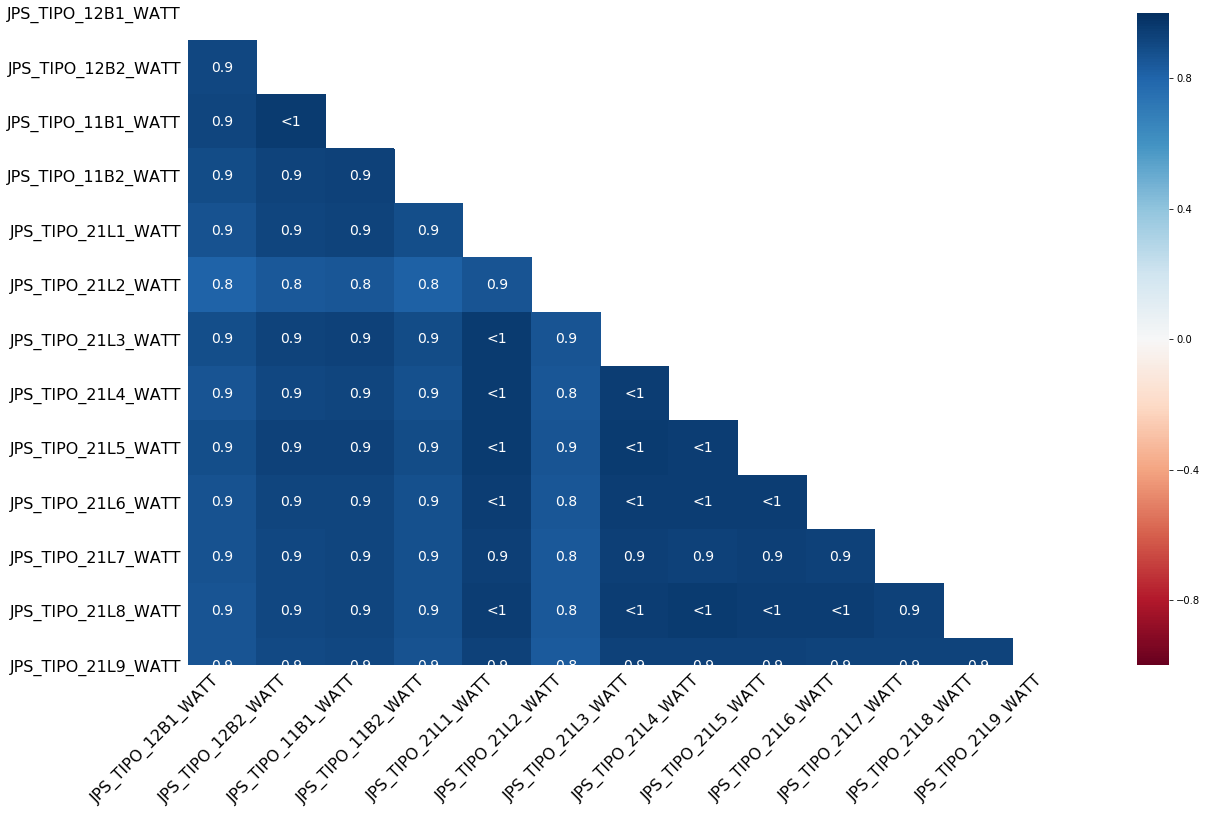

In [15]:
msno.heatmap(df1)

In [25]:
a = np.random.randn(100)
a.shape

(100,)

In [29]:
mask= np.random.choice(100, 60)

In [30]:
a[mask]= np.nan

In [31]:
a

array([        nan,         nan,         nan,         nan,         nan,
               nan,  1.46977684,         nan,         nan,         nan,
       -0.32352331,         nan,  1.05517751,         nan,         nan,
               nan,         nan,  0.79336967,         nan,  0.45929584,
        0.0213786 , -1.32483611,         nan, -0.1374577 ,         nan,
               nan,  0.14422403, -0.89598258,         nan, -1.05551099,
        1.02232859, -1.53323734,         nan, -0.69540024,         nan,
        0.96101745,         nan,         nan,         nan,  0.99359455,
               nan,  1.40360227,  0.13885707,         nan,  1.05031053,
               nan,         nan, -0.85101121, -0.8330255 , -0.08084075,
               nan,         nan,         nan,  0.70382932, -0.2088801 ,
               nan, -1.54579012,  0.48573863, -0.94023076, -0.30909654,
       -1.19595743,         nan,         nan,  0.9998479 ,         nan,
               nan, -1.66054261,         nan, -1.05063669, -0.28

In [32]:
df1['JPS_TIPO_11B1_WATT']

data
2008-01-01 00:00:00    7.8
2008-01-01 00:15:00    7.7
2008-01-01 00:30:00    7.7
2008-01-01 00:45:00    7.4
2008-01-01 01:00:00    NaN
                      ... 
2013-12-31 22:45:00    9.5
2013-12-31 23:00:00    9.5
2013-12-31 23:15:00    9.5
2013-12-31 23:30:00    9.2
2013-12-31 23:45:00    9.2
Name: JPS_TIPO_11B1_WATT, Length: 210432, dtype: float64

In [34]:
df1['JPS_TIPO_11B1_WATT'].isnull().astype(int).groupby(df1['JPS_TIPO_11B1_WATT'].notnull().astype(int).cumsum()).sum()

JPS_TIPO_11B1_WATT
1         0
2         0
3         0
4         1
5         0
         ..
205287    0
205288    0
205289    0
205290    0
205291    0
Name: JPS_TIPO_11B1_WATT, Length: 205291, dtype: int64